<a href="https://colab.research.google.com/github/LarissaHuang/Fraud-Detection-Python/blob/main/Fraud_Detection_Python_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents

>>>[EDA](#scrollTo=6e8b12a1)

>>>[Using SMOTE for unbalanced data](#scrollTo=43762398)

>>[Plotting the resampled train data](#scrollTo=7f3c5acc)

>>>[Compare resampled data with original data](#scrollTo=74fda9d3)

>>>>[Findings from above:](#scrollTo=2c8991f2)

>>>[Visualize two plots side by side](#scrollTo=56317421)

>>>>[Findings from above:](#scrollTo=5741f2e8)

>>[The traditional way to catch fraud](#scrollTo=9c7e506d)

>>[Machine learning classification to catch fraud](#scrollTo=440842ee)

>>>[Logistic Regression](#scrollTo=b3aef787)

>>>[Findings from above:](#scrollTo=626f3137)

>>[Random forests for fraud detection](#scrollTo=5af4dd1a)

>>>[Baseline Accuracy](#scrollTo=f027c905)

>>>[Random Forest Classifier](#scrollTo=1eeb2c1e)

>>>[Random Forest Classifier Performance evaluation](#scrollTo=88049e62)

>>>>[Findings from above:](#scrollTo=8396b6f7)

>>>[Precision-Recall Curve](#scrollTo=4b21d896)

>>[GridSearchCV to find best parameters](#scrollTo=db931bcb)

>>[Optimized Random Forest Classifier](#scrollTo=114ddd85)

>>>[Findings from above:](#scrollTo=142f458e)

>>[Ensemble Techniques](#scrollTo=29308a44)

>>>[Logistic Regression Standalone Model](#scrollTo=34aa8433)

>>>>[Findings from above](#scrollTo=3287f995)

>>[Combining 3 models using Voting Classifier](#scrollTo=cf8dca48)

>>>>[Findings from above:](#scrollTo=a025ba62)

>>>[Adjusting weights of each classifier](#scrollTo=5a2c2497)

>>>>[Findings from above:](#scrollTo=ae2f6163)

>>[Unsupervised Learning](#scrollTo=f8a27688)

>>>[Findings from above:](#scrollTo=547e392f)

>>>[Customer segmentation](#scrollTo=ab147961)

>>>>[Findings from above:](#scrollTo=5d547e69)

>>>[Clustering methods to detect fraud](#scrollTo=ca10d0c7)

>>>>[Findings from above:](#scrollTo=1c21348d)

>>>[Flagging fraud based on distance to centroid](#scrollTo=f97cba94)

>>>>[Findings from above:](#scrollTo=e92063f5)

>>>[DBSCAN](#scrollTo=0945cdaa)

>>>>[Findings from above:](#scrollTo=4c1d88ff)

>>>>[Findings from above:](#scrollTo=c4c5b256)

>>>>[Findings from above:](#scrollTo=18ce93e0)

>>>[Text Mining Techniques for Fraud Detection](#scrollTo=e8fdb75b)

>>>[Using a list of terms](#scrollTo=afcb3bf8)

>>>[Creating a flag](#scrollTo=d09d984a)

>>>[Text Cleaning](#scrollTo=7256daf3)

>>>[Topic modeling](#scrollTo=6a8e4935)

>>>[LDA model](#scrollTo=1ede5cc1)

>>>>[Findings from above:](#scrollTo=401902c5)

>>>[Flagging fraud based on topics](#scrollTo=cdafafeb)

>>>>[Findings from above:](#scrollTo=50982e01)

>>>[Visualize topics](#scrollTo=ef28eb1f)

>>>>[Findings from above:](#scrollTo=eff121db)

>>>[Add original text to topic details in a dataframe](#scrollTo=7e366126)

>>>[Create a flag for all content that has topic 0 as dominant topic](#scrollTo=363a0213)

>>>[Conclusion](#scrollTo=716be847)

>>>>[Working with imbalanced data](#scrollTo=716be847)

>>>>[Fraud detection with labeled data](#scrollTo=716be847)

>>>>[Fraud detection without labels](#scrollTo=716be847)

>>>>[Text mining](#scrollTo=716be847)



In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### EDA

First we will perform exploratory data analysis on a creditcard dataset. The column names have been transformed into feature names as part of preprocessing.

In [ ]:

df = pd.read_csv("data/creditcard_sampledata_1.csv", index_col=0)

# explore the features in dataframe
print(df)

              V1        V2         V3        V4        V5        V6        V7   
258647  1.725265 -1.337256  -1.012687 -0.361656 -1.431611 -1.098681 -0.842274  \
69263   0.683254 -1.681875   0.533349 -0.326064 -1.455603  0.101832 -0.520590   
96552   1.067973 -0.656667   1.029738  0.253899 -1.172715  0.073232 -0.745771   
281898  0.119513  0.729275  -1.678879 -1.551408  3.128914  3.210632  0.356276   
86917   1.271253  0.275694   0.159568  1.003096 -0.128535 -0.608730  0.088777   
...          ...       ...        ...       ...       ...       ...       ...   
223366  1.118331  2.074439  -3.837518  5.448060  0.071816 -1.020509 -1.808574   
239499 -2.150855  2.187917  -3.430516  0.119476 -0.173210  0.290700 -2.808988   
125342 -7.139060  2.773082  -6.757845  4.446456 -5.464428 -1.713401 -6.485365   
220725 -1.169203  1.863414  -2.515135  5.463681 -0.297971  1.364918  0.759219   
63421  -8.461845  6.866198 -11.838269  4.194211 -6.923097 -3.221147 -7.553497   

              V8        V9 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5050 entries, 258647 to 63421
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      5050 non-null   float64
 1   V2      5050 non-null   float64
 2   V3      5050 non-null   float64
 3   V4      5050 non-null   float64
 4   V5      5050 non-null   float64
 5   V6      5050 non-null   float64
 6   V7      5050 non-null   float64
 7   V8      5050 non-null   float64
 8   V9      5050 non-null   float64
 9   V10     5050 non-null   float64
 10  V11     5050 non-null   float64
 11  V12     5050 non-null   float64
 12  V13     5050 non-null   float64
 13  V14     5050 non-null   float64
 14  V15     5050 non-null   float64
 15  V16     5050 non-null   float64
 16  V17     5050 non-null   float64
 17  V18     5050 non-null   float64
 18  V19     5050 non-null   float64
 19  V20     5050 non-null   float64
 20  V21     5050 non-null   float64
 21  V22     5050 non-null   float64
 22 

In [ ]:
## Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

Class
0    5000
1      50
Name: count, dtype: int64


In [ ]:
# Print the ratio of fraud cases
print(occ/len(df.index))

Class
0    0.990099
1    0.009901
Name: count, dtype: float64


#### Findings from above:
As you can see, there is much more non-fraud than fraud transactions.

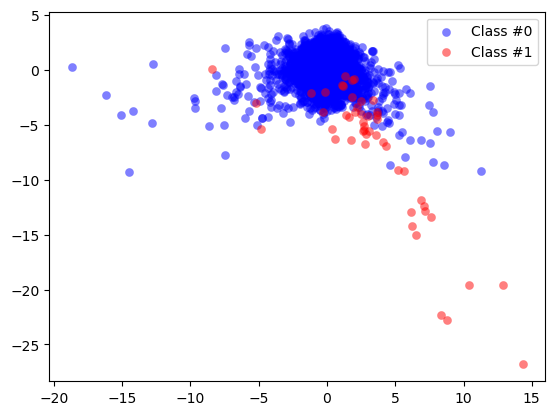

In [ ]:
def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(float)
    y = df.iloc[:, 29]
    y=np.array(y).astype(float)
    return X,y

X, y = prep_data(df)

def plot_data(X, y):
    #extract first and second feature for all data points labeled as class 0
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15, c='b')
    #extract first and second feature for all data points labeled as class 1
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()


plot_data(X,y)

### Using SMOTE for unbalanced data

SMOTE (Synthetic Minority Oversampling Technique) can help us better train our models to recognize fraud cases when there are only very few cases of fraud. Instead of just copying datapoints of the minority class, it uses characteristics of the nearest neighbours of fraud cases to create new synthetic fraud cases, and thereby avoids duplication. SMOTE is more sophisticated than Random Under Sampling, which throws away data and is computationally efficient. SMOTE is also more realistic than Random Over Sampling, which trains model on many duplicates.

However, SMOTE only works well if fraud cases are similar to each other. If fraud is spread out over data and not distinct, using nearest neighbours to create more fraud cases introduces noise in the data, as the nearest neighbours might not necessarily be fraud cases. It's important to only resample on the training set after doing a train-test split.

In [ ]:
#In order for imblearn to function as expected, we need to downgrade sklearn

!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

In [ ]:
import imblearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Define resampling method
method = SMOTE()

# split into train and test, setting stratify=y to preserve class ratio in test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
train_size=0.7, random_state=0, stratify=y)

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

# Continue fitting the model and obtain predictions
model = LogisticRegression()

model.fit(X_resampled, y_resampled)

# Get performance metrics
predicted = model.predict(X_test)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1500
         1.0       0.92      0.80      0.86        15

    accuracy                           1.00      1515
   macro avg       0.96      0.90      0.93      1515
weighted avg       1.00      1.00      1.00      1515



/Users/larissahuang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Plotting the resampled train data

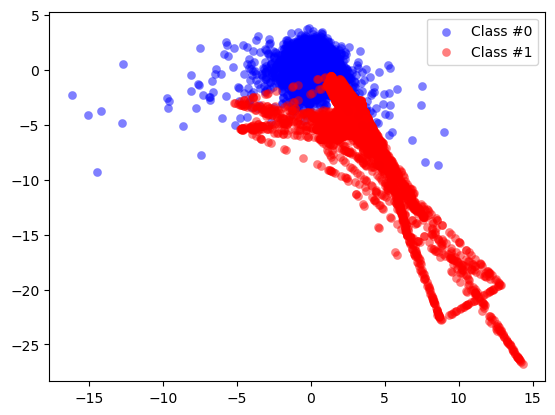

In [ ]:
plot_data(X_resampled, y_resampled)

### Compare resampled data with original data

In [ ]:
print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_resampled)))

0.0    5000
1.0      50
Name: count, dtype: int64
0.0    3500
1.0    3500
Name: count, dtype: int64


#### Findings from above:
With the resampled data, we have the same number of records in the 0 and 1 classes

### Visualize two plots side by side

In [ ]:
def compare_plot(X, y, X_resampled, y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)

    # sub-plot number 1, this is the normal data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original dataset')
    # sub-plot number 2, this is the oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
    # some settings and ready to go
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
                  ncol=2, labelspacing=0.)
    #plt.tight_layout(pad=3)
    return plt.show()

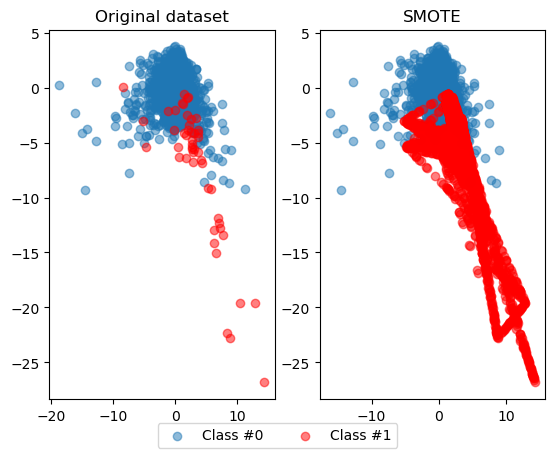

In [ ]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

#### Findings from above:
As you can see, the resampled plot has the same quantity of red points as blue, and the red points follow the distribution of the red points in the original data.

## The traditional way to catch fraud

Traditionally, fraud analysts use rules based systems to split fraud and non-fraud.

In [ ]:
# Get the mean for each group
df.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              4984  16
1                28  22


With this rule, we detect 22 out of 50 fraud cases, but can't detect the other 28, and get 16 false positives. This is not a great result because rules-based systems have their limitations:

1. Fixed thresholds per rule to determine fraud
2. Limited to yes/no outcomes
3. Fail to capture interaction between


## Machine learning classification to catch fraud

Machine learning models don't have these limitations. These are reasons to use machine learning.

1. Machine learning models adapt to the data, and thus can change over time
2. Uses all the data combined rather than a threshold per feature
3. Can give a score, rather than a yes/no
4. Will typically have a better performance and can be combined with

However, machine learning models are not always the best. Some simple rules are quite capable of catching fraud. Therefore, we want to explore whether we can combine models with rules, to improve overall performance.

### Logistic Regression

Logistic Regression Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1500
         1.0       0.91      0.67      0.77        15

    accuracy                           1.00      1515
   macro avg       0.95      0.83      0.88      1515
weighted avg       1.00      1.00      1.00      1515



/Users/larissahuang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


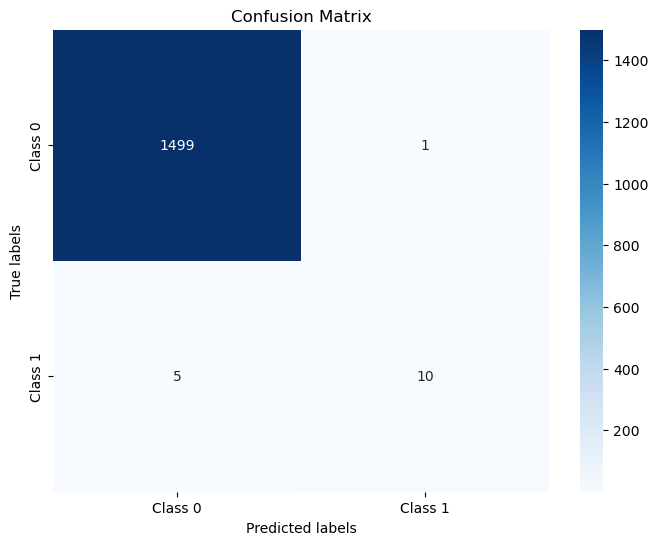

In [ ]:
# Fit a logistic regression model to our data
model = LogisticRegression()

#using X_train and y_train defined earlier in train-test split
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Print the classifcation report and confusion matrix
print('Logistic Regression Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
# print('Confusion matrix:\n', conf_mat)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=ax)  # 'd' means integer formatting
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Class 0', 'Class 1'])
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'])
plt.show()

### Findings from above:
This is a great improvement on the rules-based method of fraud detection. Note that we have fewer records to look at now because the confusion matrix is based on the test set only.

The model caught 10 cases of fraud, out of 15 cases. It misclassified 5 fraud cases as non-fraud (false negatives) and misclassified 1 non-fraud cases as fraud (false positive).

Precision:
True Positives(10) / True Positives(10) + False Positives(1) => 11/12 = 91%

Recall:
True Positives(10) / True Positives(10) + False Negatives(5) => 10/15 = 67%

It seems like this model is more heavily weighted toward precision than recall.



## Random forests for fraud detection
Random forests are a collection of decision trees on random subsets of features. Final predictions are combined results of these trees. Random forests can handle complex data and are not prone to overfit. They are interpretable by looking at feature importance, and can be adjusted to work well on highly imbalanced data. For the next segment, we will work from a new dataset.

In [ ]:
df = pd.read_csv("data/creditcard_sampledata_2.csv", index_col=0)

def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(float)
    y = df.iloc[:, 29]
    y=np.array(y).astype(float)
    return X,y

X, y = prep_data(df)

# split into train and test, setting stratify=y to preserve class ratio in test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
train_size=0.7, random_state=0, stratify=y)


First, let's determine what the baseline accuracy is, if we were to consistently predict the most frequent class. This helps identify the level of accuracy my model needs to surpass.

### Baseline Accuracy

In [ ]:
# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(len(non_fraud))/float(total_obs)) * 100

# Print the percentage: this is our "baseline accuracy" by predicting all transactions as non-fraud
print(f'baseline accuracy:', percentage)

baseline accuracy: 95.8904109589041


Let's now create a first random forest classifier for fraud detection. Hopefully we can do better than the baseline accuracy we've just calculated, which was roughly 99%.

### Random Forest Classifier

In [ ]:
from sklearn.metrics import accuracy_score

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

model.fit(X_train, y_train)

predicted = model.predict(X_test)

# Print the accuracy performance metric
print(f'random forest accuracy:', accuracy_score(y_test, predicted))

random forest accuracy: 0.9908675799086758


The RandomForestClassifier demonstrates an improvement on the baseline accuracy. However, accuracy is not a reliable performance metric when working with highly imbalanced data, as is the case in fraud detection.

A credit card company might care more for recall which is the the predicted fraud cases out of all the actual fraud cases (true positives relative to the true positives plus false negatives)

### Random Forest Classifier Performance evaluation

In [ ]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(f"roc-auc score:", roc_auc_score(y_test, probs[:,1]))

print(f"confusion matrix: \n", confusion_matrix(y_test, predicted))

print("classification report: \n", classification_report(y_test, predicted))

roc-auc score: 0.9604074074074075
confusion matrix: 
 [[2098    2]
 [  18   72]]
classification report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2100
         1.0       0.97      0.80      0.88        90

    accuracy                           0.99      2190
   macro avg       0.98      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190



#### Findings from above:

The model caught 72 cases of fraud, out of 90 cases. It  misclassified 18 fraud cases as non-fraud (false negative). It also misclassified 2 non-fraud cases as fraud (2 false positives).

Precision:
True Positives(72) / True Positives(72) + False Positives(2) => 72/74 = 97%

Recall:
True Positives(72) / True Positives(72) + False Negatives(18) => 72/80 = 80%

One can say this model optimized for total precision over recall.
    


### Precision-Recall Curve
As Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved, otherwise we might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, we use the precision-recall curve.

In [ ]:
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

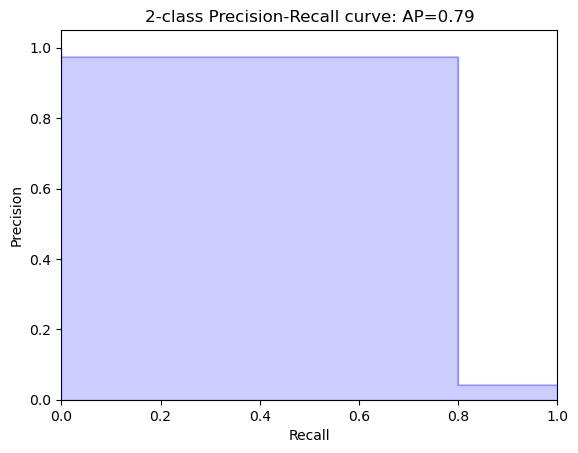

In [ ]:

from sklearn.metrics import average_precision_score, precision_recall_curve

# Calculate average precision
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)


## GridSearchCV to find best parameters
Performing a grid search cross-validation can help us find the best combination of parameters for our model's performance. We can specify scoring='recall' to prioritize recall score.

In [ ]:
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['log2'],  'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

Let's pass these settings onto our previous model and see what the improvement is.

## Optimized Random Forest Classifier

In [ ]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight='balanced', criterion='gini',
            max_depth=8, max_features='log2', min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)

def get_model_results(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  probs = model.predict_proba(X_test)
  print (classification_report(y_test, predicted))
  print (confusion_matrix(y_test, predicted))

# Get results from the model
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2100
         1.0       0.95      0.81      0.87        90

    accuracy                           0.99      2190
   macro avg       0.97      0.90      0.93      2190
weighted avg       0.99      0.99      0.99      2190

[[2096    4]
 [  17   73]]


### Findings from above:

The optimized parameters worked. This model is now optimized for recall. The number of false positives is now 4, but the false negatives has dropped to 17, which is a slight improvement from our model before optimization.

That is how the Precision-Recall trade-off works. To decide which final model is best, I need to weight the effect of not catching fraud, versus the effect of false alarms. Ultimately, this final decision is made by a fraud analyst and the fraud team together.

## Ensemble Techniques

Now I'll combine three algorithms into one model with the VotingClassifier. This allows us to benefit from the different aspects from all models, and hopefully improve overall performance and detect more fraud.

In order to understand how the Voting Classifier can potentially improve my original model, I will check the standalone results of the Logistic Regression model first.

### Logistic Regression Standalone Model

In [ ]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight='balanced', random_state=5)

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2100
         1.0       0.64      0.88      0.74        90

    accuracy                           0.97      2190
   macro avg       0.82      0.93      0.86      2190
weighted avg       0.98      0.97      0.98      2190

[[2055   45]
 [  11   79]]


#### Findings from above
The Logistic Regression standalone model had higher recall than precision for the fraud class, which is good, because we wanted to optimize for recall since the potential cost of not catching all true fraud cases are quite high compared to the cost of locking a card due to false alarms.

## Combining 3 models using Voting Classifier

In [ ]:
# Import packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Define the three classifiers to use in the ensemble, using different class weights optimized for each classifier
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini',
            max_depth=2, max_features='log2', min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf',clf2), ('dt', clf3)], voting='hard')

def get_model_results(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  print (classification_report(y_test, predicted))
  print (confusion_matrix(y_test, predicted))

# Get the results
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2100
         1.0       0.97      0.80      0.88        90

    accuracy                           0.99      2190
   macro avg       0.98      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    2]
 [  18   72]]


#### Findings from above:
This combined model did a good job at improving precision, but we still have a lower recall score.

### Adjusting weights of each classifier

In [ ]:
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[15, 10, 1], flatten_transform=True)

# Get results
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

/Users/larissahuang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2100
         1.0       0.85      0.84      0.85        90

    accuracy                           0.99      2190
   macro avg       0.92      0.92      0.92      2190
weighted avg       0.99      0.99      0.99      2190

[[2087   13]
 [  14   76]]


#### Findings from above:
As you can see, weighting the Logistic Regression Classifier higher than the Random Forest results in a higher recall score. Weighting the Random Forest Classifier higher much higher results in a higher precision at the cost of recall.

## Unsupervised Learning

Not having labels is the reality for many cases of fraud detection. Therefore, we need to understand if our data is homogenous, or whether different types of clients display very different vehavior. What is normal for one group does not mean it's normal for another. Therefore we need to use customer segmentation. For this exploration, we will use a new dataset.

In [ ]:

df = pd.read_csv("data/banksim.csv", index_col=0)

# explore the features in the dataframe
print(df)

       age gender           category    amount  fraud
171915   3      F  es_transportation   49.7100      0
426989   4      F          es_health   39.2900      0
310539   3      F  es_transportation   18.7600      0
215216   4      M  es_transportation   13.9500      0
569244   2      M  es_transportation   49.8700      0
...     ..    ...                ...       ...    ...
260136   5      M   es_hotelservices  236.1474      1
56643    5      F   es_hotelservices  139.6000      1
495817   1      F          es_travel  236.1474      1
333170   1      M   es_hotelservices  236.1474      1
579286   4      F          es_health  236.1474      1

[7200 rows x 5 columns]


In [ ]:
# Get the dataframe shape
df.shape

# Display the first 5 rows
df.head(5)

,age,gender,category,amount,fraud
171915,3,F,es_transportation,49.71,0
426989,4,F,es_health,39.29,0
310539,3,F,es_transportation,18.76,0
215216,4,M,es_transportation,13.95,0
569244,2,M,es_transportation,49.87,0


In [ ]:
# print unique categories
print(df['category'].unique())

['es_transportation' 'es_health' 'es_hyper' 'es_food'
 'es_wellnessandbeauty' 'es_fashion' 'es_hotelservices' 'es_sportsandtoys'
 'es_barsandrestaurants' 'es_home' 'es_tech' 'es_contents'
 'es_otherservices' 'es_travel' 'es_leisure']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 171915 to 579286
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       7200 non-null   object 
 1   gender    7200 non-null   object 
 2   category  7200 non-null   object 
 3   amount    7200 non-null   float64
 4   fraud     7200 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 337.5+ KB


In [ ]:
# Groupby categories and take the mean, then sort by higest amount
print(df.groupby('category').mean(numeric_only=True).sort_values(by='amount', ascending=False))

                           amount     fraud
category                                   
es_travel              231.818656  0.944444
es_leisure             229.757600  1.000000
es_hotelservices       172.756245  0.548387
es_sportsandtoys       157.251737  0.657895
es_otherservices       149.648960  0.600000
es_tech                132.852862  0.179487
es_health              126.604704  0.242798
es_home                120.688317  0.208333
es_wellnessandbeauty    66.167078  0.060606
es_fashion              59.780769  0.020619
es_contents             55.170000  0.000000
es_hyper                46.788180  0.125000
es_barsandrestaurants   43.841793  0.022472
es_food                 35.216050  0.000000
es_transportation       27.422014  0.000000


### Findings from above:
We can see that the majority of fraud is observed in travel, leisure and sports categories

### Customer segmentation

In [ ]:
# Group by age category and get the mean
print(df.groupby('age').mean(numeric_only=True))

        amount     fraud
age                     
0    49.468935  0.050000
1    35.622829  0.026648
2    37.228665  0.028718
3    37.279338  0.023283
4    36.197985  0.035966
5    37.547521  0.023990
6    36.700852  0.022293
U    39.117000  0.000000


In [ ]:
print(df['age'].value_counts())

age
2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: count, dtype: int64


We can see that fraud is more prevalent across certain age categories

Let's investigate the average amounts spend in normal transactions versus fraud transactions. This gives an idea of how fraudulent transactions differ structurally from normal transactions.

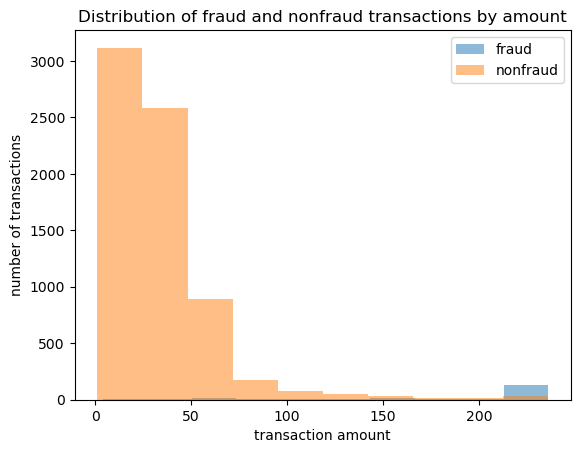

In [ ]:
# Create two dataframes with fraud and non-fraud data
df_fraud = df.loc[df['fraud'] == 1]
df_non_fraud = df.loc[df['fraud'] == 0]

# Plot histograms of the amounts in fraud and non-fraud data
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.title("Distribution of fraud and nonfraud transactions by amount")
plt.xlabel("transaction amount")
plt.ylabel("number of transactions")
plt.legend()
plt.show()

#### Findings from above:
Fraudulent transactions tend to be on the larger side relative to normal transactions.

### Clustering methods to detect fraud
Next we'll load a new dataset to look at clustering methods to detect fraud.

In [ ]:
df = pd.read_csv("data/banksim_adj.csv", index_col=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#transform and scale data
X = df.values.astype(float)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

y = df["fraud"]

/Users/larissahuang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/larissahuang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/larissahuang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/larissahuang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

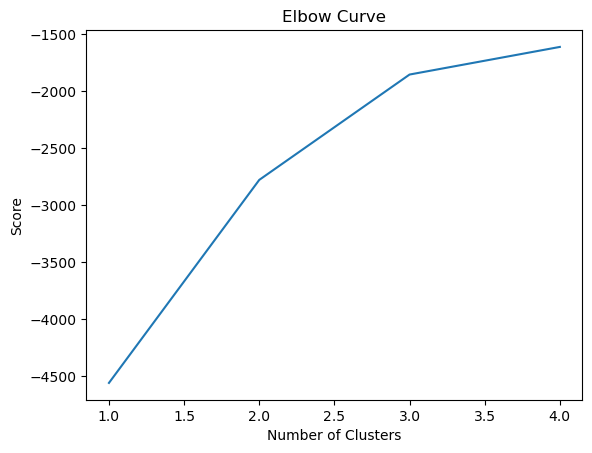

In [ ]:
# Import MiniBatchKmeans as an efficient way to implement K-means on a large dataset
from sklearn.cluster import MiniBatchKMeans

# Define the range of clusters to try
clustno = range(1, 5)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i, random_state=0) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### Findings from above:
Now you can see that the optimal number of clusters should probably be at around 3 clusters, as that is where the elbow is in the curve.

### Flagging fraud based on distance to centroid

I'm going to use the K-means algorithm to predict fraud, and compare those predictions to the actual labels that are saved, to check results.

The fraudulent transactions are typically flagged as the observations that are furthest aways from the cluster centroid. In the code below, I am doing the following steps:

-split the scaled data and labels 'y' into train and test set

-define minibatch k-means with 3 clusters and fit to the training data

-get cluster predictions from test data and obtain the cluster centroids

-defined the boundary between fraud and nonfraud to be at 95% of distance distribution and higher (in other words, if they are in the top 5th percentile in distance from the cluster centroid). If I were to lower the threshold for cases flagged as fraud, I would flag more cases overall but also get more false positives.

In [ ]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Define K-means model
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0



ROC AUC score: 0.9701335611374876


/Users/larissahuang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ROC AUC score: 0.9701335611374876


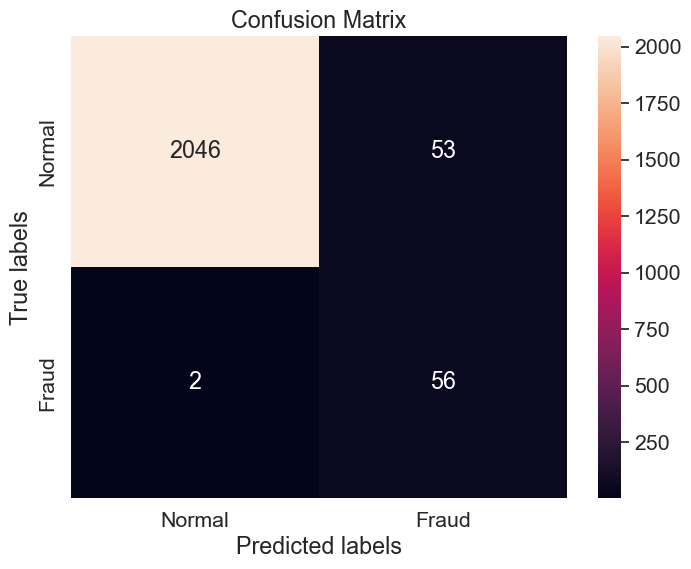

In [ ]:
print(f"ROC AUC score:", roc_auc_score(y_test, km_y_pred))

# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(km_cm, annot=True, fmt='d', cmap='rocket', ax=ax)  # 'd' means integer formatting
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Fraud'])
ax.yaxis.set_ticklabels(['Normal', 'Fraud'])
plt.show()



#### Findings from above:
The model caught almost all cases of fraud but also misclassified quite a lot (53) of non fraud cases as fraud. This can definitely be improved.

### DBSCAN
A different way of clustering is finding the smallest cluster. DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. DBSCAN finds core samples of high density and expands clusters from them. This works well on data which contains clusters of similar density. This is a type of algorithm you can use to identify fraud as very small clusters. Some attributes of DBSCAN that differ from K-Means are:

- No need to predefine amount of clusters

- Adjust maximum distance between points within clusters

- Assign minimum amount of samples in clusters

- Better performance on weirdly shaped data

- Higher computational costs

homogeneity score: evaluates the quality of a clustering algorithm. A score of 1 means that each cluster contains only data points which are members of a single class.

silhouette score: how similar a point is to its own cluster compared to others. A score close to 1 indicates that the sample is far away from the neighboring clusters.

In [ ]:
# Import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, silhouette_score

# Initialize and fit the DBSCAN model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_

# Get the length of unique labels for cluster IDs with set(pred_labels)
# Calculates the total number of clusters excluding any clusters labeled as noise or outliers (-1)
n_clusters = len(set(pred_labels)) - (1 if -1 in y else 0)

# Print performance metrics for DBSCAN
print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % homogeneity_score(y, pred_labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

Estimated number of clusters: 26
Homogeneity: 0.922
Silhouette Coefficient: 0.707


#### Findings from above:
The number of clusters is much higher than with K-means. Now let's have a look at those clusters and decide which one to flag as fraud.

In [ ]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels >= 0])

# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels>=0])

# Sort the sample counts of the clusters and take the top 4 smallest clusters
smallest_clusters = np.argsort(counts)[:4]

# Print the results
print("The smallest clusters are clusters:")
print(smallest_clusters)

# Print the counts of the smallest clusters only
print("Their counts are:")
print(counts[smallest_clusters])

The smallest clusters are clusters:
[21 18 24 15]
Their counts are:
[10 10 11 11]


#### Findings from above:
Now we know which smallest clusters can be flagged as fraud. Next I'll check the results with the actual labels. In a real-world scenario, we won't have reliable labels so these flagged cases can be checked against historically known cases of fraud. For now, I will use the fraud labels (y) to check the model results.

In [ ]:
# Create a dataframe of the predicted cluster numbers and fraud labels
df = pd.DataFrame({'clusternr':pred_labels,'fraud':y})

# Create a condition flagging fraud for the smallest clusters
df['predicted_fraud'] = np.where((df['clusternr']==21)|(df['clusternr']==18)|(df['clusternr']==24)|(df['clusternr']==15),1 , 0)

# Run a crosstab on the results
print(pd.crosstab(df['fraud'], df['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6968  21
1               179  21


#### Findings from above:
The good: all of our flagged cases are actually fraud!

The bad: the model failed to catch  158 cases of fraud.

The reasoning: Since I'm only taking the 4 smallest clusters, by definition I flag less cases of fraud, but that means I also have fewer false positives (21 at upper right quadrant).  Increasing the amount of smallest clusters flagged could improve how many fraud cases I catch, but at the cost of more false positives.

In the next section I'll try to further improve fraud detection models by including text analysis.

## Text Mining Techniques for Fraud Detection

To demonstrate text mining techniques, I will be using a data set of cleaned internal emails from Enron.

In [ ]:
df = pd.read_csv("data/enron_emails_clean.csv", index_col=0)

df.head()

,From,To,Date,content,clean_content
Message-ID,,,,,
<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,INVESTools Advisory\nA Free Digest of Trusted ...,investools advisory free digest trusted invest...
<1512159.1075863666797.JavaMail.evans@thyme>,('richard.sanders@enron.com'),('richard.sanders@enron.com'),2000-09-20 19:07:00,----- Forwarded by Richard B Sanders/HOU/ECT o...,forwarded richard b sanders hou ect pm justin ...
<26118676.1075862176383.JavaMail.evans@thyme>,('m..love@enron.com'),('m..love@enron.com'),2001-10-30 16:15:17,hey you are not wearing your target purple shi...,hey wearing target purple shirt today mine wan...
<10369289.1075860831062.JavaMail.evans@thyme>,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),2002-01-30 17:54:18,Leslie Milosevich\n1042 Santa Clara Avenue\nAl...,leslie milosevich santa clara avenue alameda c...
<26728895.1075860815046.JavaMail.evans@thyme>,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),2002-01-30 19:36:01,"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...",rini twait e th ave longmont co rtwait graphic...


In [ ]:
# Find all cleaned emails that contain 'sell enron stock'
mask = df['clean_content'].str.contains('sell enron stock', na=False)

# Select the data from df using the mask
print(df.loc[mask])

                                                                    From   
Message-ID                                                                 
<6336501.1075841154311.JavaMail.evans@thyme>  ('sarah.palmer@enron.com')  \

                                                                      To   
Message-ID                                                                 
<6336501.1075841154311.JavaMail.evans@thyme>  ('sarah.palmer@enron.com')  \

                                                             Date   
Message-ID                                                          
<6336501.1075841154311.JavaMail.evans@thyme>  2002-02-01 14:53:35  \

                                                                                        content   
Message-ID                                                                                        
<6336501.1075841154311.JavaMail.evans@thyme>  \nJoint Venture: A 1997 Enron Meeting Belies O...  \

                                    

### Using a list of terms
By joining the search terms with |, I can search a multitude of terms in the dataset.

In [ ]:
# Create a list of terms to search for
searchfor = ['enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

# Filter cleaned emails on searchfor list and select from df
filtered_emails = df.loc[df['clean_content'].str.contains('|'.join(searchfor), na=False)]
print(filtered_emails)

                                                                            From   
Message-ID                                                                         
<8345058.1075840404046.JavaMail.evans@thyme>     ('advdfeedback@investools.com')  \
<1512159.1075863666797.JavaMail.evans@thyme>       ('richard.sanders@enron.com')   
<26118676.1075862176383.JavaMail.evans@thyme>              ('m..love@enron.com')   
<10369289.1075860831062.JavaMail.evans@thyme>       ('leslie.milosevich@kp.org')   
<26728895.1075860815046.JavaMail.evans@thyme>       ('rtwait@graphicaljazz.com')   
...                                                                          ...   
<15875618.1075860830584.JavaMail.evans@thyme>             ('bandersn@loyno.edu')   
<30798399.1075841348382.JavaMail.evans@thyme>       ('chairman.enron@enron.com')   
<957052.1075861359136.JavaMail.evans@thyme>           ('chairman.ken@enron.com')   
<18936682.1075861158419.JavaMail.evans@thyme>      ('resources.human@enron.c

### Creating a flag
I will create an actual flag variable that gives a 1 when the emails get a hit on the search terms of interest, and 0 otherwise. This is the last step in order to actually use the text data content as a feature in a machine learning model, or as an actual flag on top of model results.

In [ ]:
# Create flag variable where the emails match the searchfor terms
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)


# Count the values of the flag variable
count = df['flag'].value_counts()
print(count)

flag
0    1776
1     314
Name: count, dtype: int64


### Text Cleaning

Whenever working with text data, the following text cleaning steps need to be applied:
1. Tokenization - split strings into words
2. Remove all stopwords - common words that don't convey significant meaning
3. Lemmatization - convert words to root form with lexical knowledge (more sophisticated than stemming)
4. Stemming - reduce words to base form by excluding prefix or suffix

First we need to import nltk, and the stopwords and WordLemmatizer packages from nltk.

In [ ]:
# Install and import parent libraries
!pip install nltk
import nltk
nltk.download('wordnet')

# Import nltk packages and string
from nltk.corpus import stopwords
import string

# Import the lemmatizer from nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

The function `clean()` takes in two parameters: text and stop. text is the string that needs to be cleaned and stop is a list of stopwords.

Inside the function, the `rstrip()` method is used to remove trailing whitespaces.

Next, new string `stop_free` that contains only the words from text that are not in stop and are not digits is created using list comprehension.

Then, a new string `punc_free` that contains only the characters from `stop_free that` are not in `exclude` (a list of punctuation characters) is created using list comprehension.

Finally, the words in `punc_free` are lemmatized using the lemmatize method of the lemma object. The lemmatized words are joined together into a string `normalized` with spaces in between the words.

In [ ]:

# Define stopwords to exclude
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent", "ect", "u", "fwd", "www", "com"))

# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)


#define normalized
normalized = ""

# Define word cleaning function
def clean(text, stop):
    text = text.rstrip()
    # Remove stopwords
    stop_free = " ".join([word for word in text.lower().split() if ((word not in stop) and (not word.isdigit()))])
    # Remove punctuations
    punc_free = ''.join(word for word in stop_free if word not in exclude)
    # Lemmatize all words
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Clean the emails in df and print results
text_clean=[]
for text in df['clean_content']:
    text_clean.append(clean(text, stop).split())

# we have a length of 2090 because this dataframe has 2090 emails
print(f"length of text_clean:",len(text_clean))


#print words from first email
print(f"words from first email:", (text_clean[:1]))

length of text_clean: 2090
words from first email: [['investools', 'advisory', 'free', 'digest', 'trusted', 'investment', 'advice', 'unsubscribe', 'free', 'newsletter', 'please', 'see', 'issue', 'fried', 'sell', 'stock', 'gain', 'month', 'km', 'rowe', 'january', 'index', 'confirms', 'bull', 'market', 'aloy', 'small', 'cap', 'advisor', 'earns', 'lbix', 'compounding', 'return', 'pine', 'tree', 'pcl', 'undervalued', 'high', 'yield', 'bank', 'put', 'customer', 'first', 'aso', 'word', 'sponsor', 'top', 'wall', 'street', 'watcher', 'ben', 'zacks', 'year', 'year', 'gain', 'moving', 'best', 'brightest', 'wall', 'street', 'big', 'money', 'machine', 'earned', 'ben', 'zacks', 'five', 'year', 'average', 'annual', 'gain', 'start', 'outperforming', 'long', 'term', 'get', 'zacks', 'latest', 'stock', 'buylist', 'free', 'day', 'trial', 'investools', 'c', 'go', 'zaks', 'mtxtu', 'zakstb', 'investools', 'advisory', 'john', 'brobst', 'investools', 'fried', 'sell', 'stock', 'lock', 'month', 'km', 'david', '

### Topic modeling
I first need to define my dictionary and corpus first, as those need to go into the model. Using corpora from gensim, I do the following:

- Use the `dictionary` function from gensim's `corpora` package to create a dictionary from our text data, in this case, from the cleaned emails. The dictionary contains the number of times a word appears for each word.

- Create a corpus that tells us how many words each email contains and how many times those words appear. This is done with the `doc2bow()` function which converts our text data into a bag-of-words format. That means, each row in our data is now a list of words with their associated word count.


In [ ]:
import gensim
from gensim import corpora

# Define the dictionary
dictionary = corpora.Dictionary(text_clean)

# Define the corpus.
corpus = [dictionary.doc2bow(text) for text in text_clean]


### LDA model
Latent Dirichlet Allocation, or LDA, is an example of topic model and is commonly used. It creates a "topic per text item" model and "words per topic" model. This helps us to discover topics in text data. We can use it to compare topics of fraud cases to non-fraud cases. I pass my dictionary and corpus into the LDA model, picking the number of topics I want.

Each of the topics is represented by a vector that details which words are likely to occur, given a text record on that topic.

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=dictionary,passes=5)

topics = ldamodel.print_topics(num_words=5)

for topic in topics:
    print(topic)

(0, '0.022*"enron" + 0.012*"company" + 0.007*"stock" + 0.007*"energy" + 0.006*"employee"')
(1, '0.037*"image" + 0.037*"td" + 0.027*"net" + 0.025*"money" + 0.024*"tr"')
(2, '0.008*"pm" + 0.007*"please" + 0.007*"market" + 0.006*"outage" + 0.006*"conference"')
(3, '0.008*"bakernet" + 0.007*"enron" + 0.006*"mailto" + 0.005*"u" + 0.004*"e"')
(4, '0.044*"enron" + 0.010*"hou" + 0.009*"message" + 0.009*"pm" + 0.008*"original"')


#### Findings from above:
It seems like Topic 0 is most associated with fraud, based on the frequency of the words 'enron', 'company', 'stock' and 'employee'. Deciding which topic is suspicious often required some subject area expertise or research.

### Flagging fraud based on topics


The function get_topic_details gets the details of the topics for each line of text. With this function, I can append the results back to my original data.

In [ ]:
def get_topic_details(ldamodel, corpus):
    # Initialize an empty DataFrame
    topic_details_df = pd.DataFrame(columns=['Dominant_Topic', '% Score', 'Topic_Keywords'])

    # List to hold each new row before concatenation
    rows_list = []

    # Iterate over each document in the corpus
    for i, row_list in enumerate(ldamodel[corpus]):
        # Sort the topics in the document by their contribution in descending order
        row = sorted(row_list, key=lambda x: x[1], reverse=True)
        # Get the dominant topic, percentage contribution and keywords for the first topic
        topic_num, prop_topic = row[0]
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        # Create a dictionary for the new row and add to list
        new_row = {'Dominant_Topic': int(topic_num),
                   '% Score': round(prop_topic, 4),
                   'Topic_Keywords': topic_keywords}
        rows_list.append(new_row)

    # Concatenate all rows into the DataFrame
    topic_details_df = pd.concat([topic_details_df, pd.DataFrame(rows_list)], ignore_index=True)

    # Return the DataFrame after all documents have been processed
    return topic_details_df



In [ ]:
print(get_topic_details(ldamodel, corpus))

     Dominant_Topic  % Score   
0                 3   0.5921  \
1                 3   0.7847   
2                 4   0.8974   
3                 0   0.9935   
4                 0   0.9934   
...             ...      ...   
2085              3   0.9087   
2086              2   0.5992   
2087              1   0.9993   
2088              2   0.9981   
2089              4   0.9884   

                                         Topic_Keywords  
0     bakernet, enron, mailto, u, e, see, email, dat...  
1     bakernet, enron, mailto, u, e, see, email, dat...  
2     enron, hou, message, pm, original, please, e, ...  
3     enron, company, stock, energy, employee, said,...  
4     enron, company, stock, energy, employee, said,...  
...                                                 ...  
2085  bakernet, enron, mailto, u, e, see, email, dat...  
2086  pm, please, market, outage, conference, schedu...  
2087  image, td, net, money, tr, width, class, heigh...  
2088  pm, please, market, outage, c

#### Findings from above:
The '% Score' column shows how much of the document is made up of the dominant topic compared to other topics. As you can see the % Score is very high for topic 0, at 99.35%.

### Visualize topics
Interpretation of topics can be difficult, so this visualization tool called pyLDAvis is very helpful. Each bubble on the left side represents a topic. The larger the bubble, the more prevalent that topic is. You can click on each topic to get the details per topic in the right panel. The words are the most important keywords that form the selected topic.

In [ ]:
# first install the package
!pip install pyLDAvis
import pyLDAvis.gensim

In [ ]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)

#please note that the pyLDAvis will not be displayed by GitHub. An image of the display is included in the README in the Text Mining section
pyLDAvis.display(lda_display)

#### Findings from above:
It's important to remember our models are 0-indexed (Python convention) and pyLDAvis is 1-indexed. So the topics need to be interpreted as:

-`1` in our visual = `0` in our topics list

-`4` in the visual = `3` in our topics list

In our visual, topic 1(0), which is the suspicious topic we identified earlier, encompasses topic 4(3). This may mean that certain subtopics within our suspicious topic are not suspicious.

### Add original text to topic details in a dataframe
Here, I'm using the get_topic_details() function to append the topic details to my original dataframe so we can compare the topic keywords and original cleaned text side by side.

In [ ]:
contents = pd.DataFrame({'Original text': text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)
print(topic_details.head())

  Dominant_Topic  % Score                                     Topic_Keywords   
0              3   0.5921  bakernet, enron, mailto, u, e, see, email, dat...  \
1              3   0.7847  bakernet, enron, mailto, u, e, see, email, dat...   
2              4   0.8974  enron, hou, message, pm, original, please, e, ...   
3              0   0.9935  enron, company, stock, energy, employee, said,...   
4              0   0.9934  enron, company, stock, energy, employee, said,...   

                                       Original text  
0  [investools, advisory, free, digest, trusted, ...  
1  [forwarded, richard, b, sander, hou, pm, justi...  
2  [hey, wearing, target, purple, shirt, today, m...  
3  [leslie, milosevich, santa, clara, avenue, ala...  
4  [rini, twait, e, th, ave, longmont, co, rtwait...  


### Create a flag for all content that has topic 0 as dominant topic
Here I'm creating a new column `flag` that shows 1 when the topic is 0 and 0 when the topic is any other topic. This is quick and easy way to indicate that these emails may be suspicious.

In [ ]:
# Create flag for text highest associated with topic 0
topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 0), 1, 0)
print(topic_details.head())

  Dominant_Topic  % Score                                     Topic_Keywords   
0              3   0.5921  bakernet, enron, mailto, u, e, see, email, dat...  \
1              3   0.7847  bakernet, enron, mailto, u, e, see, email, dat...   
2              4   0.8974  enron, hou, message, pm, original, please, e, ...   
3              0   0.9935  enron, company, stock, energy, employee, said,...   
4              0   0.9934  enron, company, stock, energy, employee, said,...   

                                       Original text  flag  
0  [investools, advisory, free, digest, trusted, ...     0  
1  [forwarded, richard, b, sander, hou, pm, justi...     0  
2  [hey, wearing, target, purple, shirt, today, m...     0  
3  [leslie, milosevich, santa, clara, avenue, ala...     1  
4  [rini, twait, e, th, ave, longmont, co, rtwait...     1  


Fantastic! We have now flagged all data that is highest associated with topic 0, that seems to cover internal conversation about enron stock options.

In this project, I have demonstrated a variety of ways to conduct fraud analysis in Python. 